In [1]:
#Data collection
import pandas_datareader as pdr

In [2]:
key='2149960eb2d50412dd790d6f99f995fe3a5c109f'
df = pdr.get_data_tiingo('GOOG', api_key=key)

<ipython-input-2-56d44dbaed79>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('GOOG', api_key=key)


In [3]:
df.to_csv('Google.csv')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Google.csv")

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2019-03-18 00:00:00+00:00,1184.26,1190.00,1177.421,1183.30,1292633,59.2130,59.5000,58.87105,59.1650,25852660,0.0,1.0
1,GOOG,2019-03-19 00:00:00+00:00,1198.85,1200.00,1185.870,1188.81,1520688,59.9425,60.0000,59.29350,59.4405,30413760,0.0,1.0
2,GOOG,2019-03-20 00:00:00+00:00,1223.97,1227.14,1196.170,1197.35,2227786,61.1985,61.3570,59.80850,59.8675,44555720,0.0,1.0
3,GOOG,2019-03-21 00:00:00+00:00,1231.54,1231.79,1213.150,1216.00,1204045,61.5770,61.5895,60.65750,60.8000,24080900,0.0,1.0
4,GOOG,2019-03-22 00:00:00+00:00,1205.50,1230.00,1202.825,1226.32,1714247,60.2750,61.5000,60.14125,61.3160,34284940,0.0,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,GOOG,2024-03-11 00:00:00+00:00,138.94,139.98,137.0700,137.07,22462576,138.94,139.98,137.0700,137.07,22462576,0.0,1.0
1255,GOOG,2024-03-12 00:00:00+00:00,139.62,140.28,138.2100,138.25,18951920,139.62,140.28,138.2100,138.25,18951920,0.0,1.0
1256,GOOG,2024-03-13 00:00:00+00:00,140.77,142.19,140.0100,140.06,19589151,140.77,142.19,140.0100,140.06,19589151,0.0,1.0
1257,GOOG,2024-03-14 00:00:00+00:00,144.34,144.73,141.4850,142.30,35991108,144.34,144.73,141.4850,142.30,35991108,0.0,1.0
1258,GOOG,2024-03-15 00:00:00+00:00,142.17,144.34,141.1301,143.41,41039494,142.17,144.34,141.1301,143.41,41039494,0.0,1.0


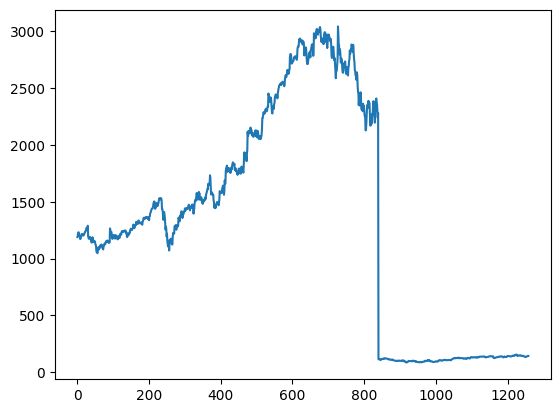

In [17]:
plt.plot(df['high'])

In [11]:
##for close column will do stock prediction
df1=df.reset_index()['close']

In [12]:
df1.shape

(1259,)

In [16]:
df1.sort_values(ascending=False)

676    3014.18
677    2999.05
672    2992.91
673    2987.76
668    2987.03
        ...   
916      87.07
959      86.77
918      86.70
954      86.46
917      83.49
Name: close, Length: 1259, dtype: float64

In [9]:
df1

0       1184.26
1       1198.85
2       1223.97
3       1231.54
4       1205.50
         ...   
1254     138.94
1255     139.62
1256     140.77
1257     144.34
1258     142.17
Name: close, Length: 1259, dtype: float64

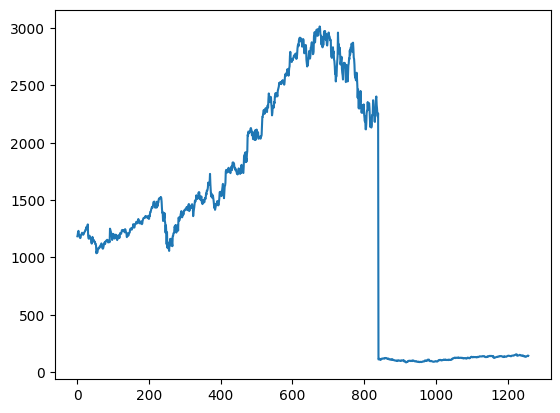

In [11]:
#plotting
plt.plot(df1)

In [12]:
## LSTM are sensitive to the scale of the data. so we apply MinMax scaler(to trasform)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
df1=scale.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.37560097],
       [0.38057932],
       [0.38915068],
       ...,
       [0.01954489],
       [0.02076303],
       [0.02002259]])

In [14]:
df1.shape

(1259, 1)

In [21]:
## splitting of the data->
##incase of time series data->divide data based on date as here next data  always  dependent on previous data

train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data, test_data=df1[0:train_size, : ], df1[train_size : len(df1) ,  : ]

KeyError: 'key of type tuple not found and not a MultiIndex'

In [20]:
train_size, test_size

(818, 441)

In [19]:
import numpy
#Data preprocessing
def create_dateset(dataset, time_step=1):
  #convert an array of values into dataset matrix
  dataX, dataY=[],  []
  for i in range(len(dataset)- time_step-1):
    a= dataset[i: (i+time_step), 0] ## i=0,   0,1,2,3,....99 (x)   100(y)
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return numpy.array(dataX),  numpy.array(dataY)


In [20]:
## reshape int x=t, t+1,t+2,t+3,t+4
#so say previous 100 days will determine the todays stock
time_step=100
x_train, y_train= create_dateset(train_data, time_step)
x_test, y_test=create_dateset(test_data, time_step)

NameError: name 'train_data' is not defined

In [24]:
# print(x_train)
x_train[0] #having 100 features

array([0.37560097, 0.38057932, 0.38915068, 0.39173369, 0.38284841,
       0.3785832 , 0.37572381, 0.37176569, 0.37021998, 0.37186465,
       0.37907114, 0.38113891, 0.38299172, 0.38608997, 0.38341142,
       0.38228199, 0.38003337, 0.38170874, 0.38254814, 0.38706926,
       0.38817139, 0.39022892, 0.39337153, 0.39338176, 0.39763673,
       0.40299725, 0.40007984, 0.40262191, 0.40560073, 0.41085546,
       0.3770409 , 0.37008008, 0.36821363, 0.37598995, 0.37735141,
       0.37213421, 0.36946248, 0.36813515, 0.36878005, 0.35777923,
       0.35382453, 0.36875958, 0.37379934, 0.36810785, 0.36010632,
       0.36378464, 0.36439542, 0.36076146, 0.35827058, 0.35850261,
       0.35246648, 0.3529749 , 0.34808868, 0.32509068, 0.33082994,
       0.32713457, 0.32785794, 0.33526234, 0.34015539, 0.33958897,
       0.33901231, 0.3430182 , 0.34185124, 0.34429093, 0.34807844,
       0.34764509, 0.35074675, 0.35431588, 0.35214574, 0.34219245,
       0.33995748, 0.33866427, 0.34033623, 0.34615057, 0.35068

In [25]:
x_train.shape,   x_test.shape

((717, 100), (340, 100))

In [26]:
from re import X
#reshape to 3D before making model
#reshape input to be [sample, time steps, features] which is must for LSTM
x_train=x_train.reshape(x_train.shape[0],   x_train.shape[1],  1) # converted to 3D
x_test=x_test.reshape(x_test.shape[0],   x_test.shape[1],  1)

In [28]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [31]:
#Create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [34]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
x_train[: 100]

array([[[0.37560097],
        [0.38057932],
        [0.38915068],
        ...,
        [0.36470251],
        [0.37071816],
        [0.37209667]],

       [[0.38057932],
        [0.38915068],
        [0.39173369],
        ...,
        [0.37071816],
        [0.37209667],
        [0.38260956]],

       [[0.38915068],
        [0.39173369],
        [0.38284841],
        ...,
        [0.37209667],
        [0.38260956],
        [0.37688053]],

       ...,

       [[0.36470251],
        [0.37071816],
        [0.37209667],
        ...,
        [0.4320143 ],
        [0.43175839],
        [0.42995677]],

       [[0.37071816],
        [0.37209667],
        [0.38260956],
        ...,
        [0.43175839],
        [0.42995677],
        [0.43570285]],

       [[0.37209667],
        [0.38260956],
        [0.37688053],
        ...,
        [0.42995677],
        [0.43570285],
        [0.4327991 ]]])

In [37]:
model.fit(x_train, y_train, validation_data=(x_test, y_test),  epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 316ms/step - loss: 0.1754 - val_loss: 0.0366
Epoch 2/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0198 - val_loss: 0.0363
Epoch 3/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0103 - val_loss: 0.0228
Epoch 4/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0060 - val_loss: 0.0197
Epoch 5/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0036 - val_loss: 0.0087
Epoch 6/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 7/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 8/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 10/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0011 - val_l

In [51]:
#prediction
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 38ms/step


In [52]:
test_predict

array([[0.01105545],
       [0.01061927],
       [0.01017495],
       [0.00975983],
       [0.00938675],
       [0.00910676],
       [0.00895463],
       [0.0089269 ],
       [0.00902032],
       [0.00921489],
       [0.00947786],
       [0.00977229],
       [0.01005598],
       [0.01031317],
       [0.01054493],
       [0.01074326],
       [0.0108961 ],
       [0.01099562],
       [0.01108292],
       [0.01117852],
       [0.01128609],
       [0.0113967 ],
       [0.01148606],
       [0.01152881],
       [0.01151054],
       [0.01142807],
       [0.01129468],
       [0.01114273],
       [0.01099136],
       [0.01082623],
       [0.01064269],
       [0.01043401],
       [0.01020802],
       [0.00998031],
       [0.009751  ],
       [0.00953487],
       [0.00932996],
       [0.00912799],
       [0.00894449],
       [0.00878739],
       [0.0086661 ],
       [0.00857607],
       [0.00849931],
       [0.00843502],
       [0.00838675],
       [0.00835783],
       [0.00836717],
       [0.008

In [47]:
# #Trnsformback to original form
# train_predict=scale.inverse_transform(train_predict)
# test_predict=scale.inverse_transform(test_predict)

In [56]:
##RMSE perfomance metrics on scaled data
import math
math.sqrt(mean_squared_error(y_train, train_predict))

0.025628644629577223

In [57]:
#On test data
math.sqrt(mean_squared_error(y_test, test_predict))

0.005883076505947311

In [58]:
#Trnsformback to original form
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

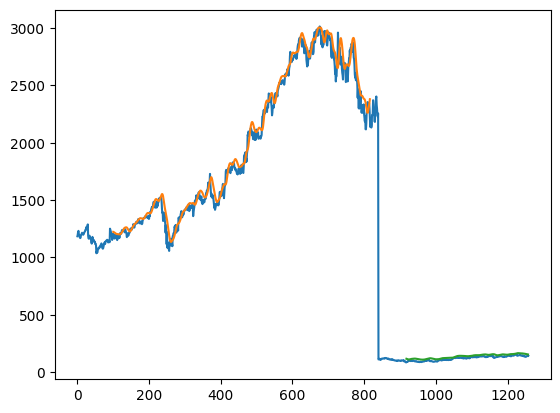

In [60]:
#plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[: , : ] = np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, : ] = train_predict
#shift test predictions for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[: , : ] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df1)-1, :  ] = test_predict
#plot baseline and predictions
plt.plot(scale.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [61]:
#predict for the next 30 days
len(test_data)#Need previous 100 days data to predict the present

441

In [62]:
x_input=test_data[341: ].reshape(1, -1)#341 to 441 is prev 100 days
x_input.shape

(1, 100)

In [65]:
#converting to list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
temp_input#data from test data

[0.018565593768020503,
 0.019323094561349032,
 0.01473373164681355,
 0.013631602114177886,
 0.013617953451235034,
 0.01441981239912785,
 0.014266264941020717,
 0.015040826563027816,
 0.015385455302334951,
 0.01599623296902777,
 0.01636474686848489,
 0.01668890261337774,
 0.016982348866649146,
 0.016446638846142034,
 0.01725532212550628,
 0.01711201116460628,
 0.017722788831299113,
 0.018046944576191954,
 0.018838567026877622,
 0.018238025857391944,
 0.018572418099491925,
 0.01881126970099192,
 0.019288972903991893,
 0.01867478307156335,
 0.01861677625405621,
 0.01881126970099192,
 0.018053768907663383,
 0.017207551805206275,
 0.017002821861063434,
 0.016084949278156336,
 0.016685490447642014,
 0.01635792253701347,
 0.018753262883484775,
 0.01813566088532052,
 0.01747370073259198,
 0.01711201116460628,
 0.01722461263388485,
 0.01696187587223486,
 0.017180254479320572,
 0.018323330000784798,
 0.01863383708273478,
 0.01916613493750618,
 0.019896338404949008,
 0.020210257652634702,
 0.0202

In [67]:
#prediction for the next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1: ])
    print("{} day input {}".format(i, x_input))
    x_input=x_input.reshape(1, -1)
    x_input=x_input.reshape((1, n_steps, 1))
    #print(x_input)
    yhat=model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1: ]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i+=1

  else:
    x_input=x_input.reshape((1, n_steps, 1))
    yhat=model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i+=1


print(lst_output)




[0.02410637]
101
1 day input [0.01932309 0.01473373 0.0136316  0.01361795 0.01441981 0.01426626
 0.01504083 0.01538546 0.01599623 0.01636475 0.0166889  0.01698235
 0.01644664 0.01725532 0.01711201 0.01772279 0.01804694 0.01883857
 0.01823803 0.01857242 0.01881127 0.01928897 0.01867478 0.01861678
 0.01881127 0.01805377 0.01720755 0.01700282 0.01608495 0.01668549
 0.01635792 0.01875326 0.01813566 0.0174737  0.01711201 0.01722461
 0.01696188 0.01718025 0.01832333 0.01863384 0.01916613 0.01989634
 0.02021026 0.02024438 0.0197735  0.01971891 0.01959948 0.01913201
 0.01940499 0.01861336 0.01839157 0.01946299 0.02015566 0.02057877
 0.02053441 0.02072891 0.02067431 0.02026826 0.02098482 0.02200164
 0.02191293 0.02224391 0.02281374 0.02393634 0.02398753 0.0243458
 0.02373502 0.01989634 0.02020685 0.02049006 0.02096435 0.02112813
 0.02156148 0.02174573 0.02276938 0.02226097 0.0214557  0.02171843
 0.02062654 0.01988269 0.02003283 0.02059242 0.02109742 0.02108718
 0.01885563 0.01931627 0.01840522 

In [68]:
day_new=np.arange(1, 101)
#need to predict 30 days in future
day_pred=np.arange(101, 131)

In [69]:
len(df1)

1259

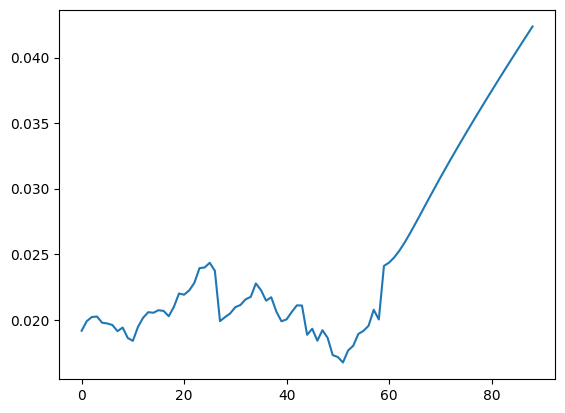

In [73]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:]) #from 1200 to 1259+next 30 days

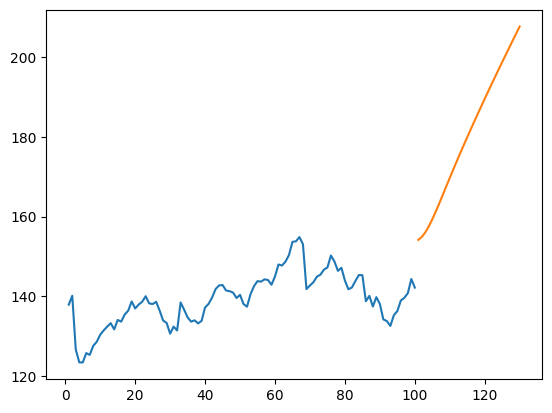

In [71]:
#plotting
plt.plot(day_new, scale.inverse_transform(df1[1159: ])) #real data from 1159 to 1259
plt.plot(day_pred, scale.inverse_transform(lst_output))#next 30 days data